In [1]:
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(0)

# Generate random data
body = np.random.uniform(1, 10, 50)
texture = np.random.uniform(1, 10, 50)
score = np.random.uniform(0, 5, 50)

# Round the values to one decimal place
body = np.round(body, 1)
texture = np.round(texture, 1)
score = np.round(score, 1)

# Create a DataFrame
df = pd.DataFrame({
    'body': body,
    'texture': texture,
    'score': score
})

# Save the DataFrame to a CSV file
df.to_csv('random_data.csv', index=False)

print("Data saved to 'random_data.csv'")

Data saved to 'random_data.csv'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 로드
df = pd.read_csv('random_data.csv')

# 데이터 확인
print(df.head())

   body  texture  score
0   5.9      6.1    3.4
1   7.4      4.9    1.4
2   6.4      9.9    3.7
3   5.9      1.9    4.8
4   4.8      2.9    1.2


In [3]:
# 입력 변수와 목표 변수 설정
X = df[['body', 'texture']]
y = df['score']

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차 계산)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1.34


In [6]:
# 새로운 데이터 예측
new_data = pd.DataFrame({
    'body': [3.5, 7.2],
    'texture': [4.0, 2.9]
})

# 예측 수행
predictions = model.predict(new_data)
print(predictions)

[3.08383261 2.89343601]


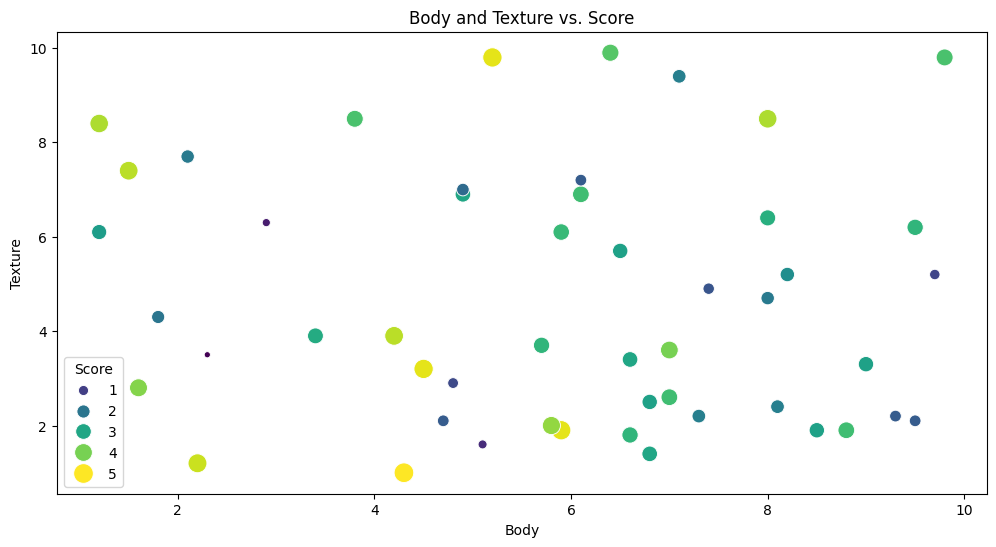

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('random_data.csv')

# 데이터 분포 시각화
plt.figure(figsize=(12, 6))

# scatter plot: body vs. texture, colored by score
sns.scatterplot(data=df, x='body', y='texture', hue='score', palette='viridis', size='score', sizes=(20, 200))
plt.title('Body and Texture vs. Score')
plt.xlabel('Body')
plt.ylabel('Texture')
plt.legend(title='Score')

plt.show()

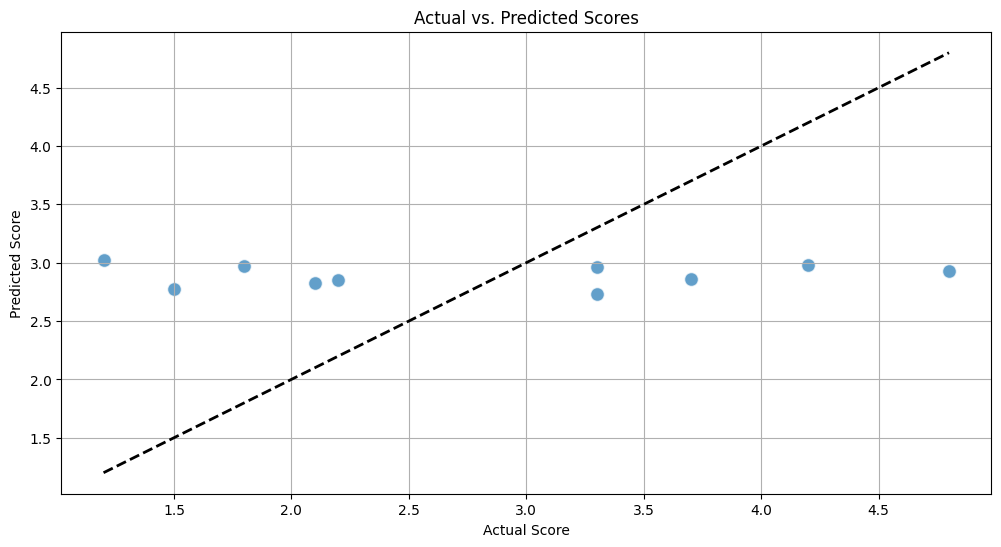

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# 데이터 로드
df = pd.read_csv('random_data.csv')

# 입력 변수와 목표 변수 설정
X = df[['body', 'texture']]
y = df['score']

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 시각화
plt.figure(figsize=(12, 6))

# 실제 vs 예측 시각화
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.grid(True)

plt.show()

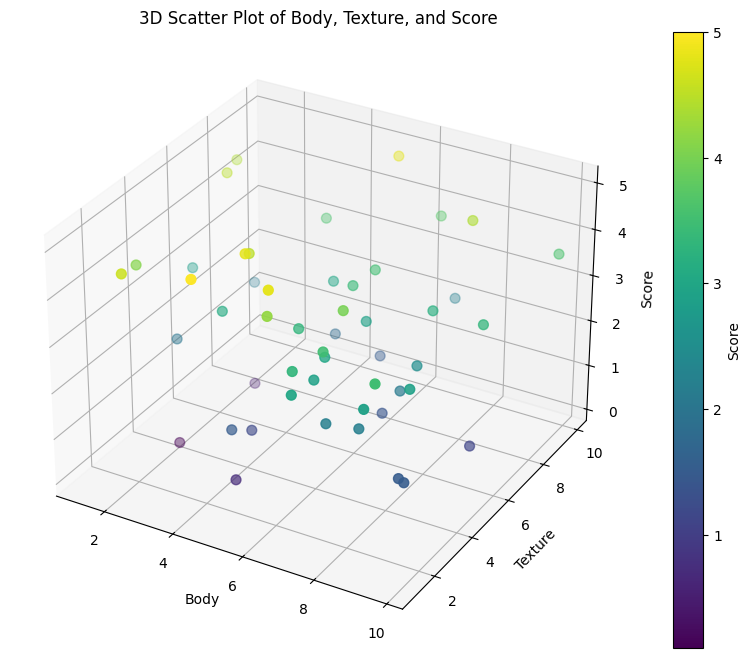

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 플롯을 위한 데이터 준비
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 데이터 플롯
sc = ax.scatter(df['body'], df['texture'], df['score'], c=df['score'], cmap='viridis', s=50)
plt.colorbar(sc, label='Score')

ax.set_xlabel('Body')
ax.set_ylabel('Texture')
ax.set_zlabel('Score')
ax.set_title('3D Scatter Plot of Body, Texture, and Score')

plt.show()